# Pete's day 3:
Last day, Pete understood that the class distribution for the PIMA dataset was imbalanced. This looks like a real and well studied problem (see http://sci2s.ugr.es/imbalanced) but, it seems that the end solution depends on the problem.

The first thing to do is to explicitly tell the classifier the distribution of the class (we are going to consider the positive examples). But it gets more complicated for multiclass problems.
- After loading the libraries, the dataset and doing the standardization step.
- First we are going to plot the class distribution.
- Then we are going to train the classifier specifying the specific class distribution.

## Step 1: Loading data
As usual, we are going to load the data and the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from  IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

In [2]:
path = "/data/nga/datos/"

In [3]:
names = ["Number of times pregnant",
         "glucose concentration",
         "blood pressure",
         "Triceps skin fold thickness",
         "2-Hour serum insulin",
         "Body mass index",
         "Diabetes pedigree function",
         "Age (years)",
         "Diabetes"
        ]

In [4]:
data = pd.read_csv(path+"pima-indians-diabetes.data",names=names)

### 1.2 Plotting the distribution of target variables

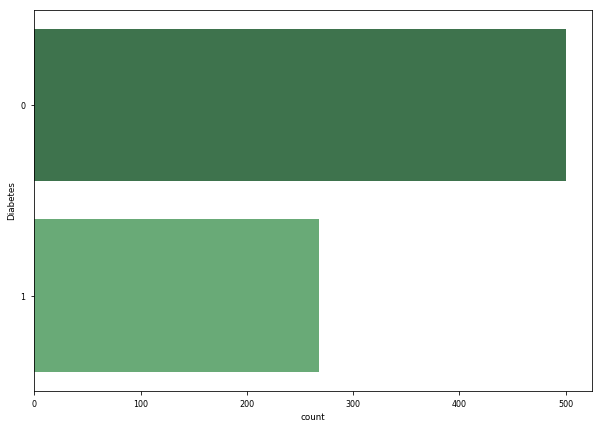

In [5]:
sns.set_context("paper")
plt.figure(figsize=(10,7))
sns.countplot(y="Diabetes", data=data, palette="Greens_d")
plt.show()

As we can see, the problem is imbalanced. There are far way more examples from the *negative* class than from the *positive* class.

In [6]:
pos_examples = len(data[data['Diabetes']==1])
neg_examples = len(data[data['Diabetes']==0])
total_examples = len(data)
balance_pos_examples = pos_examples/neg_examples

In [7]:
balance_pos_examples

0.536

In [8]:
data.head(n=5)

,Number of times pregnant,glucose concentration,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 1.1 Working on standarization
Manipulation of the data is needed in some situations: When the data is oddly distributed, when all data points are really close and we want to perform some kind of decomposition, like PCA, etc. The normalization step is easy to implement in fact SK-learn library provides different funcitonalities: http://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

We can scale all features at the same time or just specific features.

We are going to use only features for prediction. Target variable (y) won't be scaled.

In [9]:
X = data.drop('Diabetes',axis=1)

In [10]:
y = data['Diabetes']

Let's do the scaling: mean 0 and std 1:

In [11]:
X_scaled = preprocessing.scale(X)

In [12]:
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ..., 
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [13]:
X

,Number of times pregnant,glucose concentration,blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [14]:
X_scaled.mean(axis=0)

array([ -6.47630098e-17,  -9.25185854e-18,   1.50342701e-17,
         1.00613962e-16,  -3.00685403e-17,   2.59052039e-16,
         2.45174251e-16,   1.93132547e-16])

In [15]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## a note about positive scale
Some classifiers need only positive data, we can scale up the normalized data as follows:

In [16]:
scaler = preprocessing.MinMaxScaler()
X_positive = scaler.fit_transform(X_scaled)

In [17]:
X_positive

array([[ 0.35294118,  0.74371859,  0.59016393, ...,  0.50074516,
         0.23441503,  0.48333333],
       [ 0.05882353,  0.42713568,  0.54098361, ...,  0.39642325,
         0.11656704,  0.16666667],
       [ 0.47058824,  0.91959799,  0.52459016, ...,  0.34724292,
         0.25362938,  0.18333333],
       ..., 
       [ 0.29411765,  0.6080402 ,  0.59016393, ...,  0.390462  ,
         0.07130658,  0.15      ],
       [ 0.05882353,  0.63316583,  0.49180328, ...,  0.4485842 ,
         0.11571307,  0.43333333],
       [ 0.05882353,  0.46733668,  0.57377049, ...,  0.45305514,
         0.10119556,  0.03333333]])

In [18]:
del(scaler)

## Training and validation
Let's do a simple training with the same classifier and let's see if this preprocessing improved the classification. Then, we are going to study how our classifiers performs.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

## Step 2: Specifying the balance
In this case, the classifier has a parameter which is the class balance (see: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). According to the documentation, by specifying *class_weight = 'balanced'* automatically computes the weight for each class.

In [20]:
cls = SVC(class_weight='balanced')

In [21]:
cls.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
pred = cls.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test,pred)

In [24]:
print("Accuracy in the validation set: ",accuracy)

Accuracy in the validation set:  0.714285714286


Let's now compute the metrics we studied the day before.

In [25]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [26]:
avg_precision = average_precision_score(y_test,pred)
recall = recall_score(y_test,pred)
precision = precision_score(y_test,pred)
f1 = f1_score(y_test,pred)

In [27]:
print("Average Precision - Recall: ",avg_precision)
print("Recall Score: ",recall)
print("Precision Score: ",precision)
print("F1 score: ",f1)

Average Precision - Recall:  0.52138284251
Recall Score:  0.745454545455
Precision Score:  0.577464788732
F1 score:  0.650793650794


## First conclusions:
After the class balance, it seems the results in terms of accuracy are worse. But a closer look, will tell us that the recall score improved in almost a 20%. The precision got a 7% worse but the F1 score also improved.
In terms of classification we want to see the confusion matrix to understand better the new behaviour.

Text(0.5,1,'2-class Precision-Recall curve: AP=0.52')

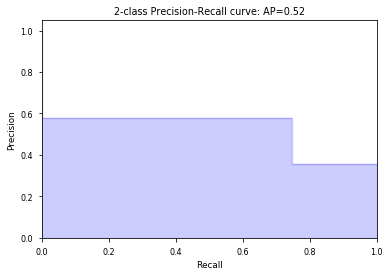

In [28]:
precision, recall, _ = precision_recall_curve(y_test, pred)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          avg_precision))

### Area under the curve

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

In [29]:
from sklearn.metrics import roc_curve, auc

First we compute the False positive ratio and the True Positive ratio.

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [31]:
fpr

array([ 0.       ,  0.3030303,  1.       ])

In [32]:
tpr

array([ 0.        ,  0.74545455,  1.        ])

In [33]:
thresholds

array([2, 1, 0])

Then we calculate the auc curve based on the true and false positive ratios.

In [34]:
roc_auc = auc(fpr, tpr)

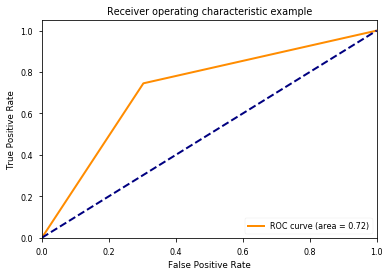

In [35]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The ROC curve is better when the area under the curve is always 1, that mean that the true positive ratio is one and the false positive ratio is cero.

### Confusion matrix
The next thing to plot is the **confusion matrix** this is useful in multiclass classification problems, but we will use it here to illustrate how it works.

First we will compute the matrix, using SK-learn functions and then we will use the library Seaborn to plot the heatmap:


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test,pred)

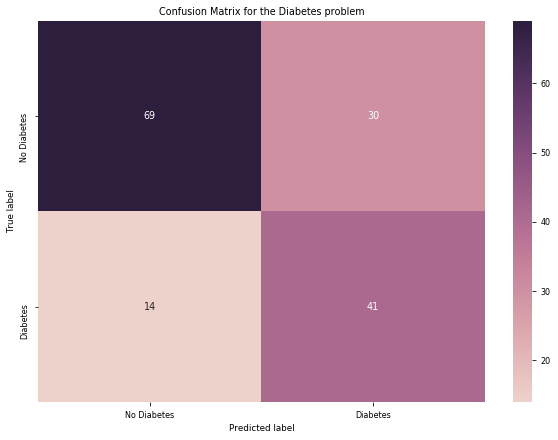

In [38]:
classes = ['No Diabetes', 'Diabetes']
df_cm = pd.DataFrame(cm,index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,7))
plt.title('Confusion Matrix for the Diabetes problem')
cmap = sns.cubehelix_palette(8, as_cmap=True)
sns.heatmap(df_cm, annot=True, cmap=cmap)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Confusion matrix results:
We see here that now, the confusions are more 'balanced'. The classification of true positives (that is, the patients with Diabetes) increased, whereas the detection of true negatives (that is, the patients with no Diabetes) decreased.

Now that we understand a little bit better the problem and the possibilities of a base classifier, we are going to explore different models to see which one fits better this problem.

# Model Selection

This stage is quite important, we are going to choose an algorithm based on the baseline for accuracy that we stablished in our study. We usually do cross validation (split the dataset into *K* buckets for training and testing), we will get *K* versions of the same algorithm trained in different buckets of data. (See http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection).

In the scikit learn library, we will train the following algorithms:

- sklearn.naive_bayes.GaussianNB
- sklearn.naive_bayes.BernoulliNB
- sklearn.naive_bayes.MultinomialNB
- sklearn.tree.DecisionTreeClassifier
- sklearn.ensemble.ExtraTreesClassifier
- sklearn.ensemble.RandomForestClassifier
- sklearn.ensemble.GradientBoostingClassifier
- sklearn.neighbors.KNeighborsClassifier
- sklearn.svm.LinearSVC
- sklearn.linear_model.LogisticRegression
- xgboost.XGBClassifier

For all the available options see: http://scikit-learn.org/stable/supervised_learning.html



In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

Please note that this is a toy example, and the following classifiers are initialized **wihtout any parameter**. But please refer to the manual page of each classifier to set up a base configuration for your problem.

In [40]:
scores = {}

In [41]:
scores['GaussianNB'] = cross_val_score(GaussianNB(), X_scaled, y, cv=5)

In [42]:
scores['BernoulliNB'] = cross_val_score(BernoulliNB(), X_scaled, y, cv=5)

In [43]:
scores['MultinomialNB']= cross_val_score(MultinomialNB(), X_positive, y, cv=5)

In [44]:
scores['DecisionTreeClassifier']= cross_val_score(DecisionTreeClassifier(), X_positive, y, cv=5)

In [45]:
scores['ExtraTreesClassifier']= cross_val_score(ExtraTreesClassifier(), X_positive, y, cv=5)

In [46]:
scores['RandomForestClassifier']= cross_val_score(RandomForestClassifier(), X_positive, y, cv=5)

In [47]:
scores['GradientBoostingClassifier']= cross_val_score(GradientBoostingClassifier(), X_positive, y, cv=5)

In [48]:
scores['KNeighborsClassifier']= cross_val_score(KNeighborsClassifier(), X_positive, y, cv=5)

In [49]:
scores['LinearSVC']= cross_val_score(LinearSVC(), X_positive, y, cv=5)

In [50]:
scores['LogisticRegression']= cross_val_score(LogisticRegression(), X_positive, y, cv=5)

In [51]:
scores['XGBClassifier']= cross_val_score(XGBClassifier(scale_pos_weight=balance_pos_examples), X_positive, y, cv=5)

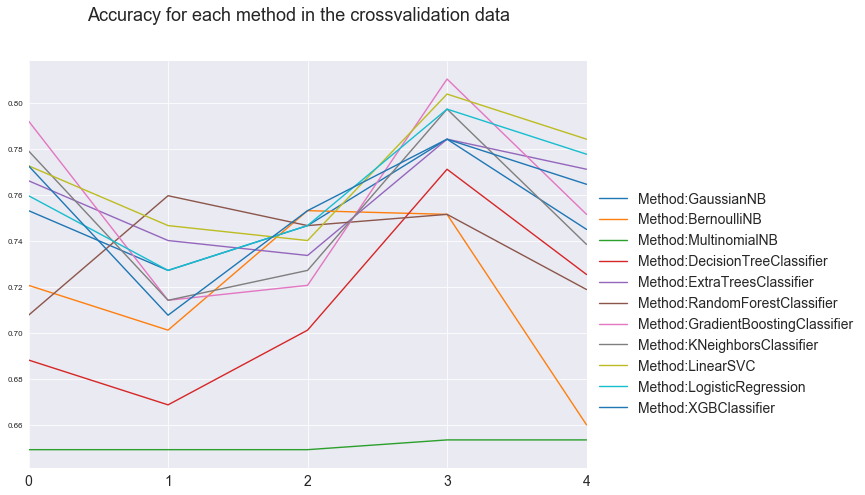

In [78]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7.5))
ax.set_xlim(0, 4)
plt.xticks(range(0,5,1), fontsize=14)
for key in scores.keys():
    ax.plot(scores[key],label='Method:' + key)

legend = ax.legend(loc='lower right',bbox_to_anchor=(1.5, 0.1), shadow=True, fontsize='x-large')
fig.suptitle("Accuracy for each method in the crossvalidation data", fontsize=18, ha='center')
plt.show()


# Results
The x axis represent the cross-validation dataset (named 0 to 4). The y axis represents the accuracy.
As we can see in the graph, it's interesting that some algorithms with a *'bad'* accuracy, do work better for certain buckets in the cross-validation dataset. For intance, the RandomForest Classifier is the best one for bucket 1. In general we can see that the boosting Tree algorithms and the Tree algorithms work pretty well for the problem. 

The next step is to select one or several of these algorithms and optimize the *hyperparameter* configuration. That process is called *hyperparameter tuning*.